In [1]:
import pandas as pd

In [2]:
#Charger le dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.shape

(20640, 10)

In [5]:
#Vérifier les valeurs manquantes
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
#Remplir les valeurs manquantes ou les supprimer
data = data.dropna(subset=["total_bedrooms"]) #suppression

In [7]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [8]:
#Trouver et compter les duplications
duplications = data.duplicated()

In [9]:
duplications

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20433, dtype: bool

In [10]:
duplications = data.duplicated().sum()
print("le nombre de lignes redondantes est " + str(duplications))
#ou print("le nombre de lignes redondantes est : {duplications}")

le nombre de lignes redondantes est 0


In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<function matplotlib.pyplot.show(close=None, block=None)>

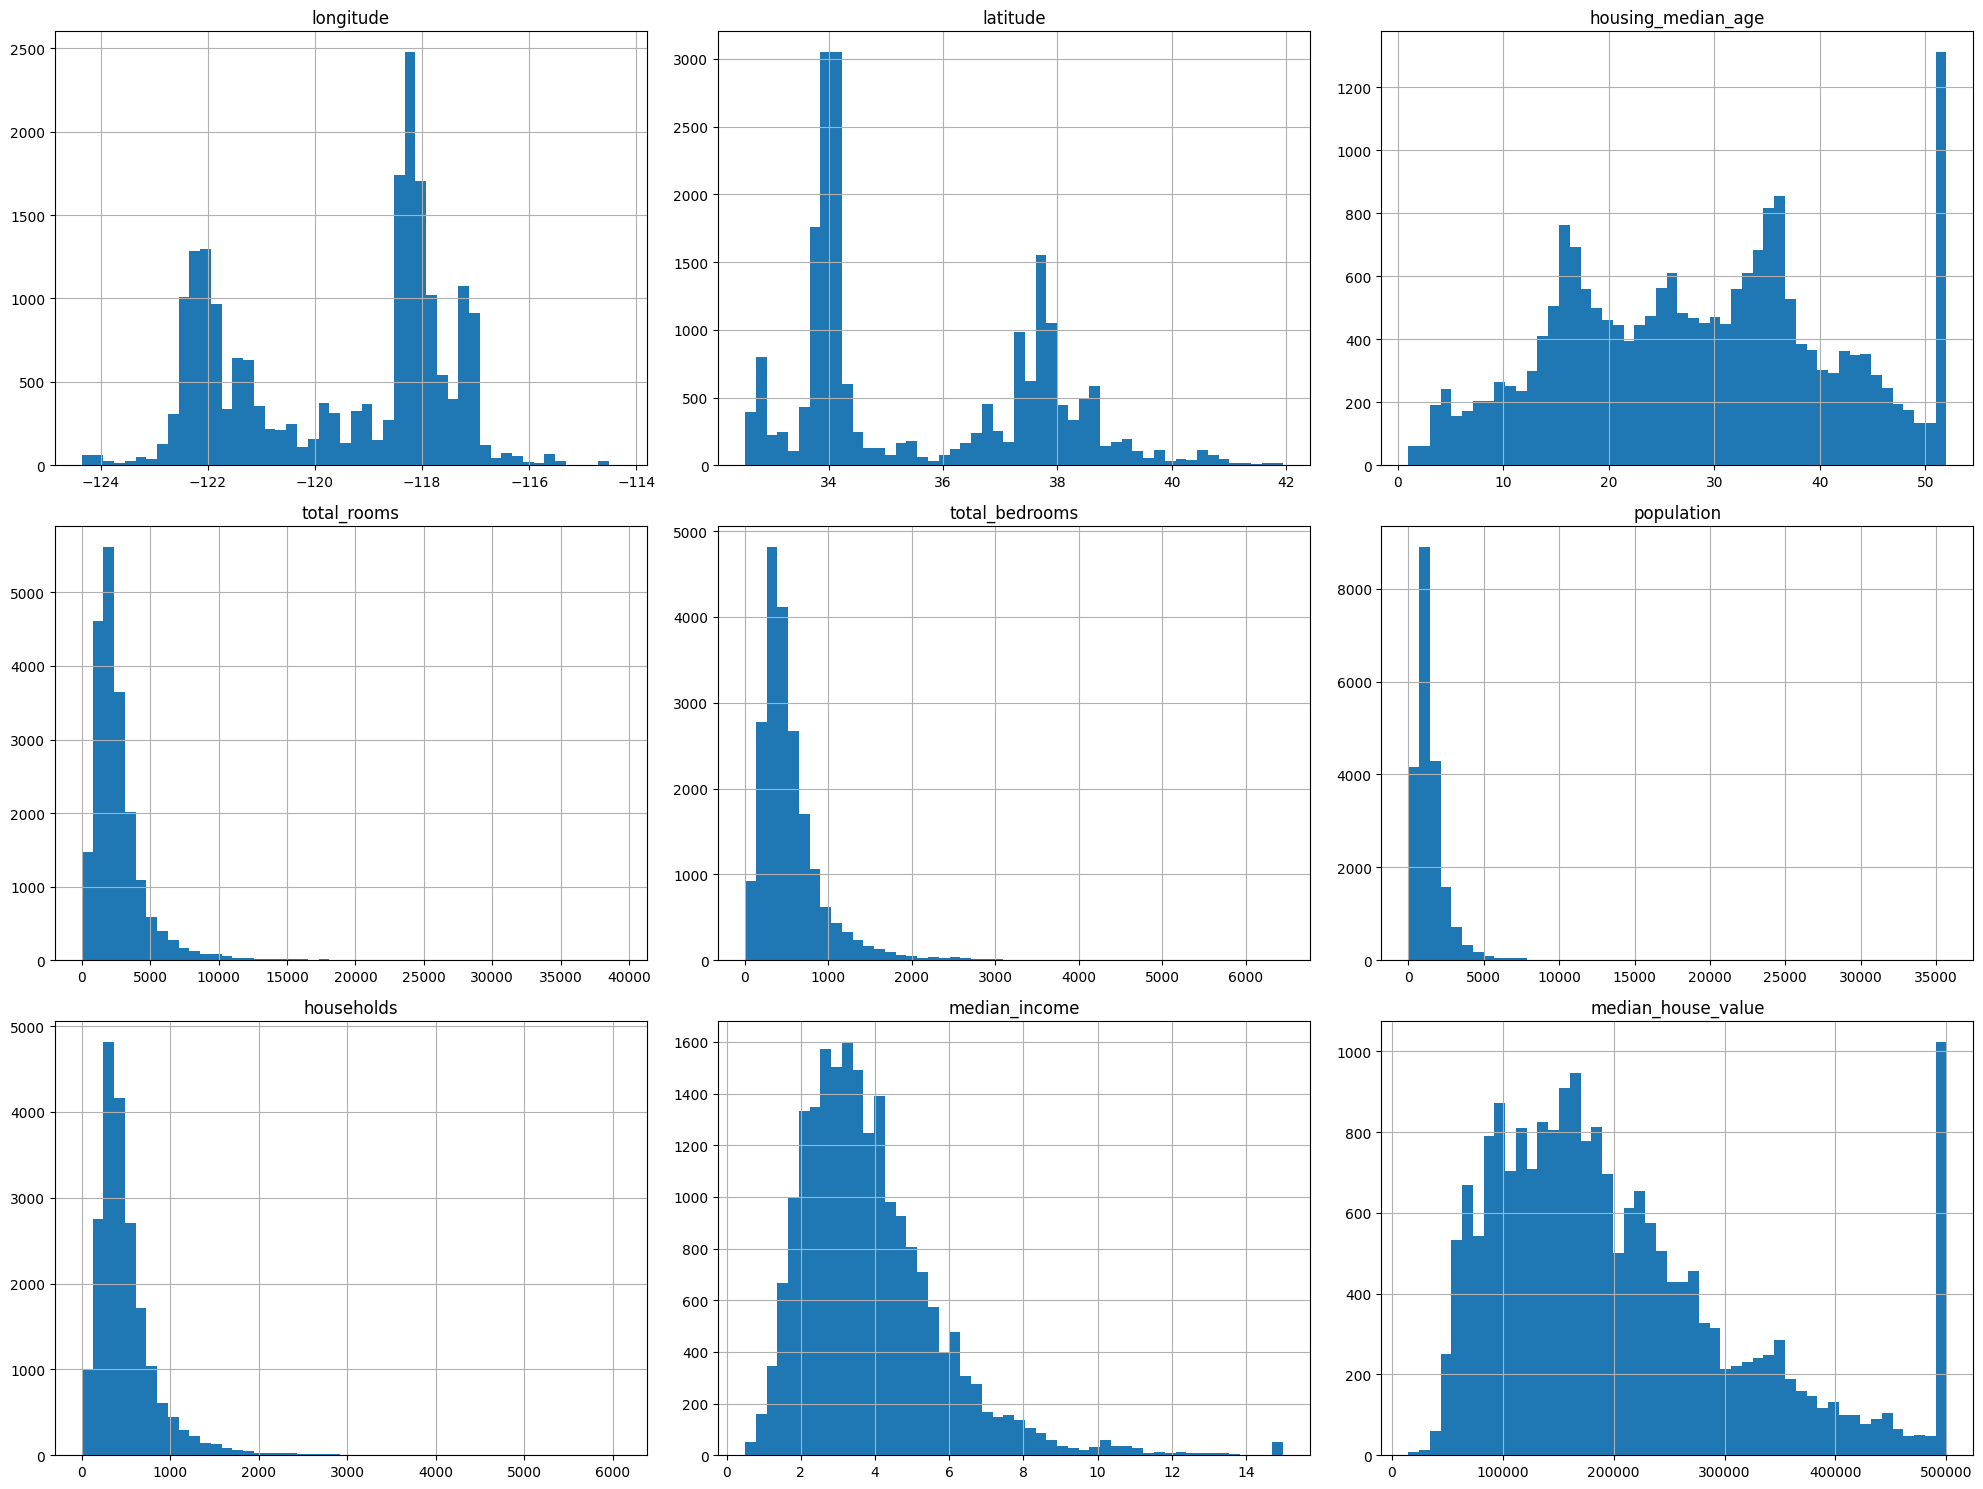

In [12]:
import matplotlib.pyplot as plt

#Créer des histogrammes pour chaque variable
data.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show

In [13]:
#Identification des colonnes numériques et catégorielles
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Colonnes numériques:")
print(numerical_columns.tolist())

print("\nColonnes catégorielles :")
print(categorical_columns.tolist()) #tolist va convertir en liste

Colonnes numériques:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Colonnes catégorielles :
['ocean_proximity']


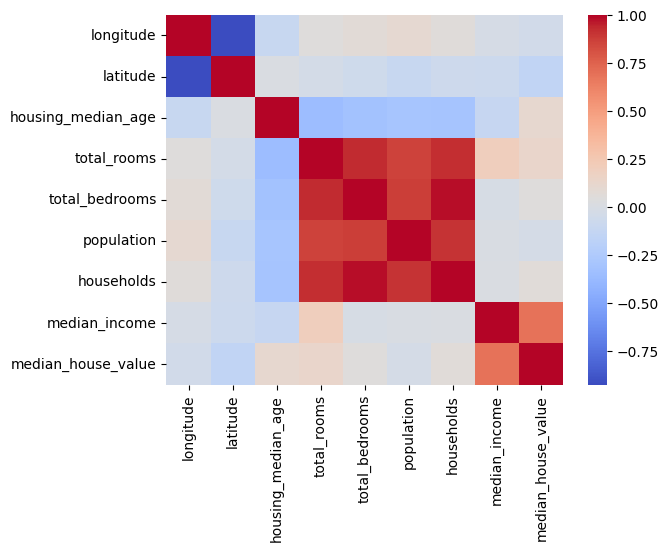

In [14]:
import seaborn as sns

#Sélctionner uniquement les colonnes numériques
data_numerical = data.select_dtypes(include=['number'])

#Visualisation de la corrélation entre les variables
corr_matrix = data_numerical.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

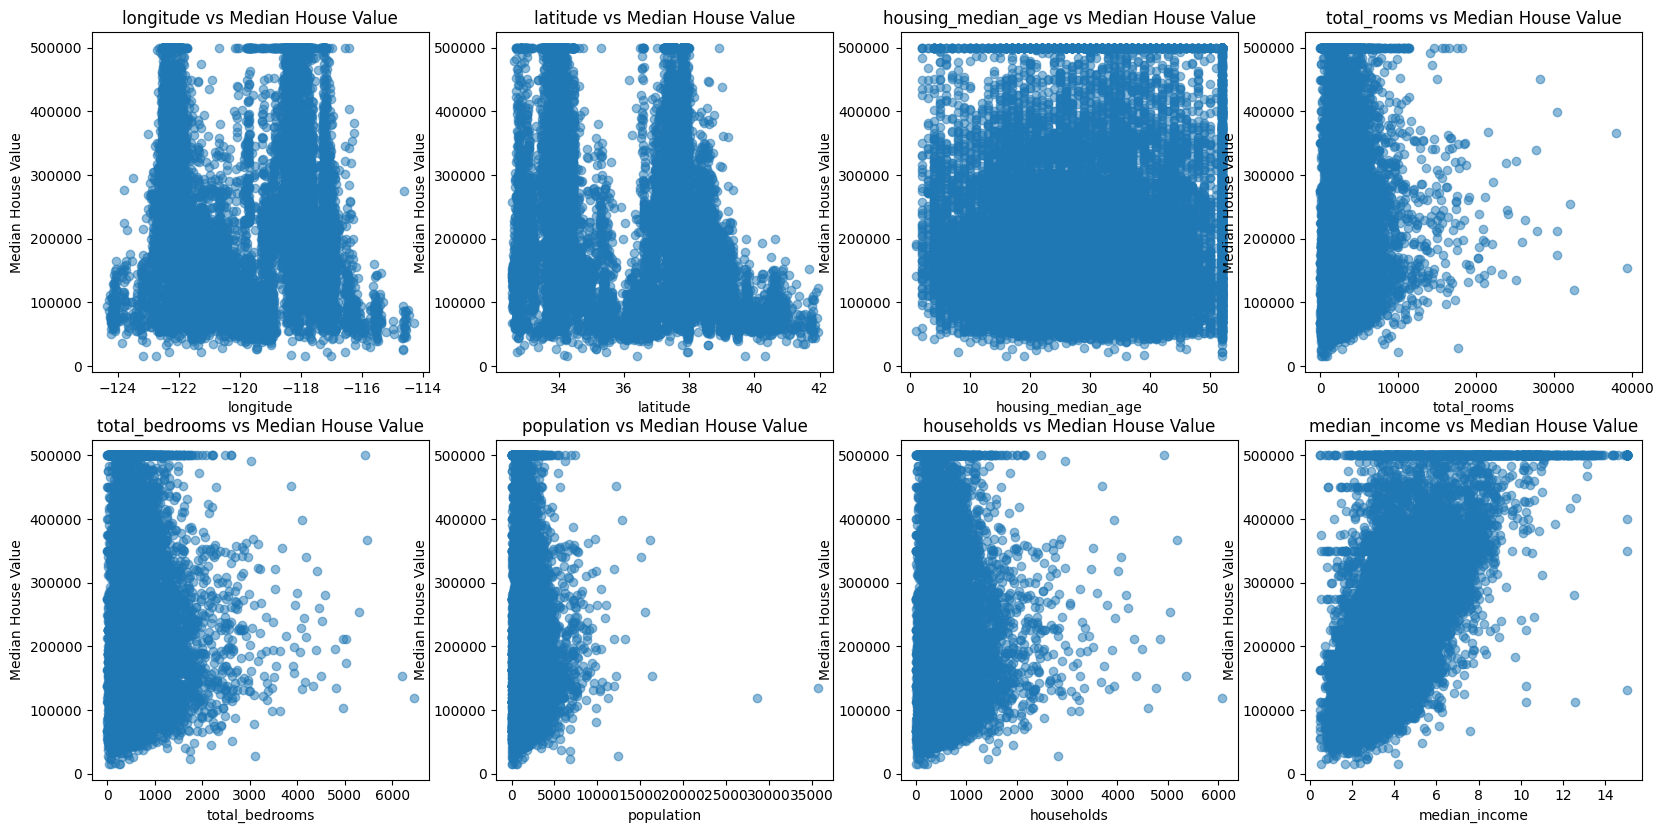

In [15]:
#Créer des scatter plots pour chaque variable par rapport au prix des maisons
features = data_numerical.columns.drop('median_house_value')

plt.figure(figsize=(20,15))
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1) #3 en lignes et 4 en colonnes, i+1 c'est la position de la figure
    plt.scatter(data[feature], data['median_house_value'], alpha=0.5) #alpha c'est l'opacité
    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")

In [16]:
#Afficher les modalités de la variable catégorielle
print(data['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [17]:
#Encodage de la variable catégorielle
#Convertir les colonnes catégorielles en variables numériques
data = pd.get_dummies(data, drop_first=True,dtype=float)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [18]:
#Séparation des caractéristiques et de la cible
X = data.drop("median_house_value", axis=1) #axis=1 signifie :
#axis=1 fait généralement référence à l'axe des colonnes (l'axe vertical) d'un tableau ou d'une matrice. Lorsqu'une opération est effectuée avec axis=1, elle est appliquée séparément à chaque colonne. 

y= data["median_house_value"]

In [19]:
from sklearn.model_selection import train_test_split

#Séparation des données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state permet de garder les memes lignes pour le test

In [20]:
X_train, X_test, y_train, y_test

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 17727    -121.80     37.32                14.0       4412.0           924.0   
 2057     -119.63     36.64                33.0       1036.0           181.0   
 6453     -118.06     34.12                25.0       3891.0           848.0   
 4619     -118.31     34.07                28.0       2362.0           949.0   
 15266    -117.27     33.04                27.0       1839.0           392.0   
 ...          ...       ...                 ...          ...             ...   
 11397    -117.97     33.72                24.0       2991.0           500.0   
 12081    -117.54     33.76                 5.0       5846.0          1035.0   
 5447     -118.42     34.01                42.0       1594.0           369.0   
 866      -122.04     37.57                12.0       5719.0          1064.0   
 15948    -122.43     37.73                52.0       3602.0           738.0   
 
        population  households  median

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Instancier les modèles
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()

In [22]:
#Entrainer le modèle de régression linéaire
linear_model.fit(X_train, y_train) #fit c'est pour entrainer, apprendre un modèle

LinearRegression()

In [23]:
#Entrainer le modèle de régression linéaire
random_forest_model.fit(X_train, y_train) #fit c'est pour entrainer, apprendre un modèle

RandomForestRegressor()

In [24]:
#Prédictions
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Evaluation des modèles
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [26]:
print(f"MSE Régression Linéaire : {mse_linear}")
print(f"r2 Régression Linéaire : {r2_linear}")
print(f"MSE Random Forest : {mse_rf}")
print(f"r2 Random Forest : {r2_rf}")

MSE Régression Linéaire : 4802173538.604191
r2 Régression Linéaire : 0.648840215443197
MSE Random Forest : 2375247995.7815547
r2 Random Forest : 0.8263095725794891


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 30]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres: {grid_search.best_params_}")

Meilleurs paramètres: {'max_depth': 30, 'n_estimators': 300}


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 30]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres: {grid_search.best_params_}")

# Réentraîner le modèle avec les meilleurs paramètres
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"MSE Random Forest optimisé: {mse_best_rf}")
print(f"r2 Random Forest optimisé: {r2_best_rf}")

Meilleurs paramètres: {'max_depth': 30, 'n_estimators': 300}
MSE Random Forest optimisé: 2353195124.351434
r2 Random Forest optimisé: 0.8279221926812006


In [29]:
#Coefficients de la régression linéaire
coefficients = pd.DataFrame(linear_model.coef_, X.columns, columns=['coefficient'])
print(coefficients)

                              coefficient
longitude                   -27108.746321
latitude                    -25657.807543
housing_median_age            1081.364206
total_rooms                     -6.322146
total_bedrooms                 103.004042
population                     -36.409751
households                      43.142725
median_income                39277.083020
ocean_proximity_INLAND      -39240.217778
ocean_proximity_ISLAND      213653.374463
ocean_proximity_NEAR BAY     -6232.416876
ocean_proximity_NEAR OCEAN    3166.477128


In [30]:
linear_model.intercept_

-2299273.762102974

In [31]:
#Importance des caractéristiques du modèle Random Forest
importances = pd.DataFrame(best_rf_model.feature_importances_, X.columns, columns=['Importance'])
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

                            Importance
median_income                 0.485382
ocean_proximity_INLAND        0.142591
longitude                     0.110198
latitude                      0.104266
housing_median_age            0.050794
population                    0.032496
total_rooms                   0.023906
total_bedrooms                0.021669
households                    0.018507
ocean_proximity_NEAR OCEAN    0.008529
ocean_proximity_NEAR BAY      0.001233
ocean_proximity_ISLAND        0.000430


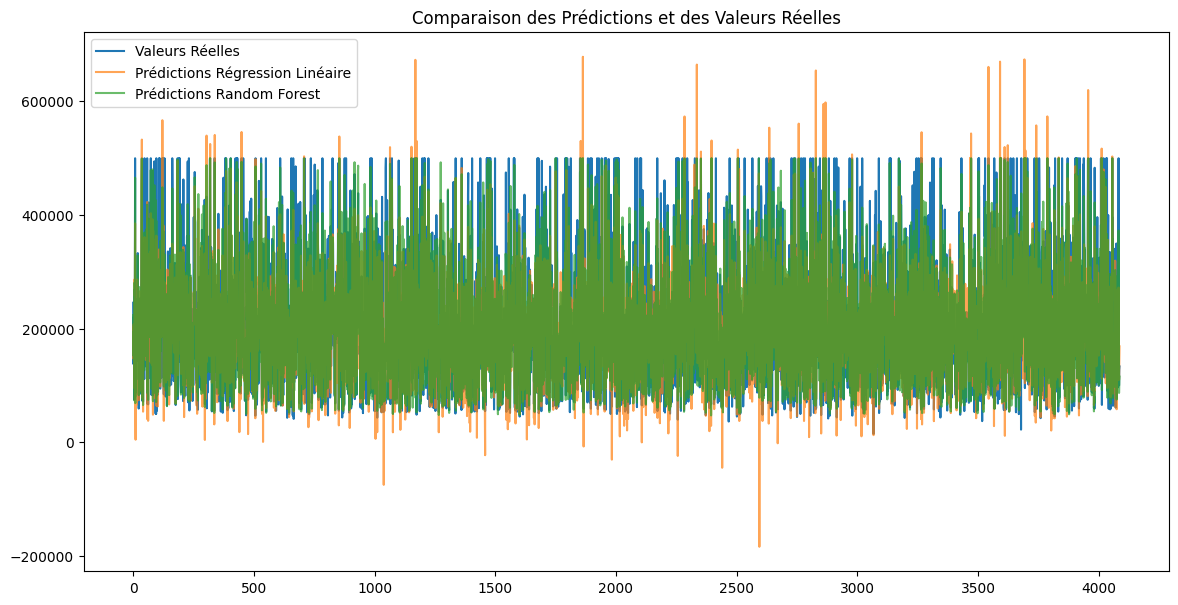

In [32]:
plt.figure(figsize=(14, 7))

plt.plot(y_test.values, label="Valeurs Réelles")
plt.plot(y_pred_linear, label="Prédictions Régression Linéaire", alpha=0.7)
plt.plot(y_pred_best_rf, label="Prédictions Random Forest", alpha=0.7)
plt.legend()
plt.title("Comparaison des Prédictions et des Valeurs Réelles")
plt.show()

In [33]:
#Sauvegarder le modèle
import joblib
joblib.dump(best_rf_model, 'house_price_rf_model.pkl')

['house_price_rf_model.pkl']

In [34]:
X_test.index

Int64Index([14416, 16383,  7731,  1410,  1335, 16260, 18011, 10086, 18294,
            18733,
            ...
             2749, 14477, 12659, 19811, 10469,  8291,  6274,  2997, 13440,
            14797],
           dtype='int64', length=4087)

In [35]:
X_test.loc[[0]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0


In [36]:
X_train.loc[[1]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0


In [37]:
#Charger le modèle pour prédiction future
model = joblib.load('house_price_rf_model.pkl')

new_data = X_test.loc[[0]]
new_predictions = model.predict(new_data)
new_predictions

array([448508.69333333])